#Taller 1_Grupo 5
###Integrantes:
#####Daniel Steven Lozada - 1010148612
#####Federico Lopez - 1002576446
#####Santiago Erazo Mora - 1082658664

In [2]:
!pip install lcapy==1.14
!pip install folium==0.2.1
!pip install pdflatex
!sudo apt-get install texlive-latex-recommended 
!sudo apt install texlive-latex-extra
!sudo apt install dvipng
!pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.9/399.9 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for folium: filename=folium-0.2.1-py3-none-any.whl size=79794 sha256=2dbc681e4d61dcf49127daa029ff641b7a2d9b3ebbbfd521eea390f876bda1c9
  Stored in directory: /root/.cache/pip/wheels/00/0c/07/d7792a5444d5bb074361ac27da53cee9d5cce59a07fe9da5dd
Successfully built folium
  Attempting uninstall: folium
    Found existing installation: folium 0.14.0
    Uninstalling folium-0.14.0:
      Successfully uninstalled folium-0.14.0
ERROR: pip's dependency resolver does not currently take into account all the packa

In [3]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import gamma
from lcapy import Circuit, j , omega, s
from lcapy import *

from scipy.signal import lti
from scipy.stats import expon
import scipy.fftpack as fourier
from scipy.fftpack import fft,fftfreq,fftshift
import seaborn as sns  ##HISTOGRAMAS
from numpy import logspace
import sympy as sym

In [4]:
#Funciones
def gaussian(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))

def neg_log_likelihood(params, x):
    mu, sigma = params
    return -np.sum(np.log(gaussian(x, mu, sigma)))

def fit_gaussian(x):
    result = minimize(neg_log_likelihood, [0, 1], args=(x,))
    mu, sigma = result.x
    return mu, sigma

def log_likelihood(lmbda, data):
    n = len(data)
    return n * np.log(lmbda) - lmbda * np.sum(data)

def log_likelihood_Poisson(lmbda, data):
    n = len(data)
    return n * np.log(lmbda) - lmbda * np.sum(data) - np.sum(np.log(gamma(data+1)))

In [5]:
ctt=Circuit(
"""
    Vi 1 0_1 step;down
    C1 1 2; right, size=1.5
    R1 2 0; down, size=1.5
    R2 2 3; right, size=1.5
    C2 3 0_2; right, size=1.5
    
    
    W 0_1 0;right
    W 0 0_2;right
    

"""
)

In [6]:
H=(ctt.C2.V(s)/ctt.Vi.V(s)).simplify()
H

                   C₁⋅R₁⋅s                    
──────────────────────────────────────────────
             2                                
C₁⋅C₂⋅R₁⋅R₂⋅s  + s⋅(C₁⋅R₁ + C₂⋅R₁ + C₂⋅R₂) + 1

In [7]:
C1=4.7e-4
C2=4.7e-4
R1=2000
R2=2000

Coeficientes_num=[C1*R1,0]
Coeficientes_dem=[C1*C2*R2*R1,C1*R1+C2*R1+C2*R2,1]

In [8]:
import control

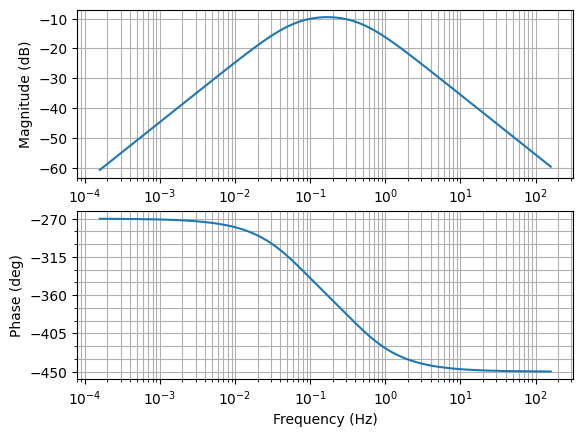

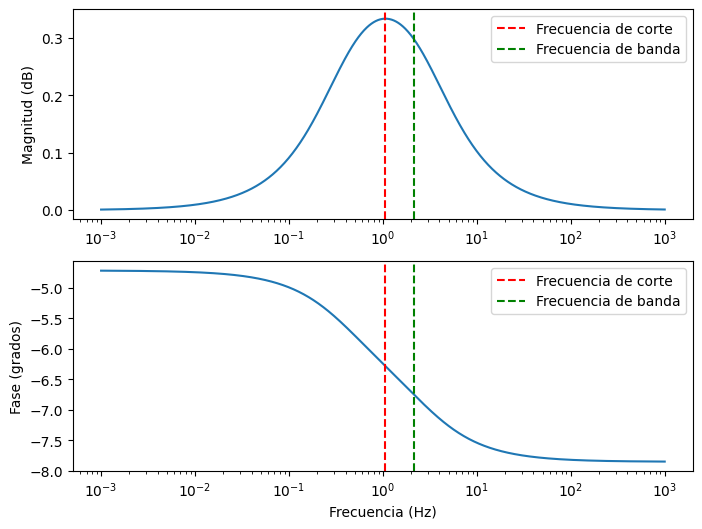

In [9]:
sys = control.TransferFunction(Coeficientes_num, Coeficientes_dem)  # Crear el sistema LTI
dt = 0.002  # Base de tiempo deseada en segundos
sys_d = control.c2d(sys, dt)

# Definir el rango de frecuencias
omega = np.logspace(-3, 3, num=1000)

# Obtener la respuesta en frecuencia
mag, phase, omega = control.bode(sys, omega, dB=True, Hz=True)

f0 = 1/(np.sqrt(C1*C2*R1*R2))
B = 1 / (R1 * C1) + 1 / (R2 * C2)

# Graficar la respuesta en frecuencia
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
ax1.semilogx(omega, mag)
ax1.set_ylabel('Magnitud (dB)')
ax1.axvline(f0, color='red', linestyle='--', label='Frecuencia de corte')
ax1.axvline(B, color='green', linestyle='--', label='Frecuencia de banda')
ax1.legend()

ax2.semilogx(omega, phase)
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('Fase (grados)')
ax2.axvline(f0, color='red', linestyle='--', label='Frecuencia de corte')
ax2.axvline(B, color='green', linestyle='--', label='Frecuencia de banda')
ax2.legend()

plt.show()

In [10]:
print(sys_d)


0.002121 z - 0.002121
----------------------
z^2 - 1.994 z + 0.9936

dt = 0.002



(array([0.00939709, 0.00948407, 0.00957186, 0.00966046, 0.00974988,
        0.00984012, 0.0099312 , 0.01002312, 0.01011589, 0.01020952,
        0.01030401, 0.01039938, 0.01049562, 0.01059276, 0.01069079,
        0.01078973, 0.01088959, 0.01099036, 0.01109207, 0.01119472,
        0.01129831, 0.01140287, 0.01150838, 0.01161488, 0.01172235,
        0.01183082, 0.01194029, 0.01205077, 0.01216228, 0.01227481,
        0.01238838, 0.012503  , 0.01261867, 0.01273542, 0.01285324,
        0.01297215, 0.01309215, 0.01321327, 0.0133355 , 0.01345886,
        0.01358336, 0.01370901, 0.01383581, 0.01396379, 0.01409294,
        0.01422329, 0.01435484, 0.0144876 , 0.01462159, 0.01475681,
        0.01489328, 0.01503101, 0.01517001, 0.01531029, 0.01545186,
        0.01559473, 0.01573892, 0.01588444, 0.01603131, 0.01617952,
        0.0163291 , 0.01648006, 0.0166324 , 0.01678615, 0.01694132,
        0.01709791, 0.01725595, 0.01741544, 0.0175764 , 0.01773884,
        0.01790277, 0.01806821, 0.01823517, 0.01

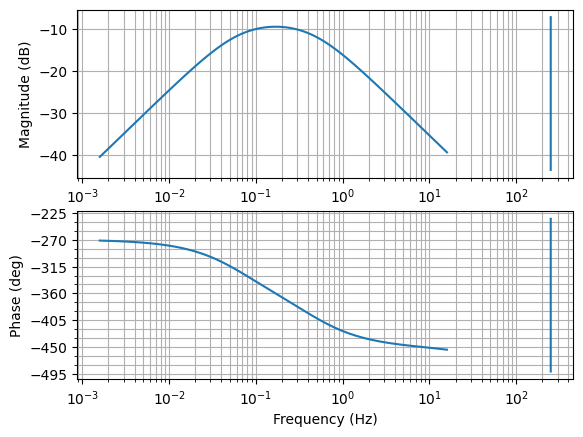

In [12]:
# Ajustar el rango de frecuencias
frequencies = np.logspace(-2, 2, num=1000)  # Generar una lista de frecuencias en escala logarítmica

# Graficar la respuesta en frecuencia
control.bode_plot(sys_d, omega=frequencies, dB=True, Hz=True)

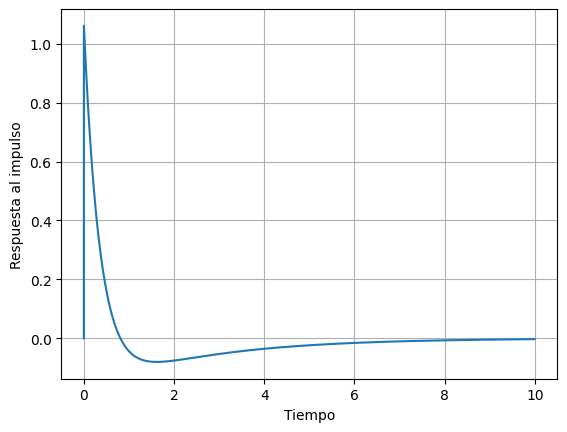

In [13]:
t, y = control.impulse_response(sys_d)
plt.plot(t, y)
plt.xlabel('Tiempo')
plt.ylabel('Respuesta al impulso')
plt.grid(True)
plt.show()

<ipython-input-4-7cfb25b375df>:20: RuntimeWarning: divide by zero encountered in log
  return n * np.log(lmbda) - lmbda * np.sum(data) - np.sum(np.log(gamma(data+1)))


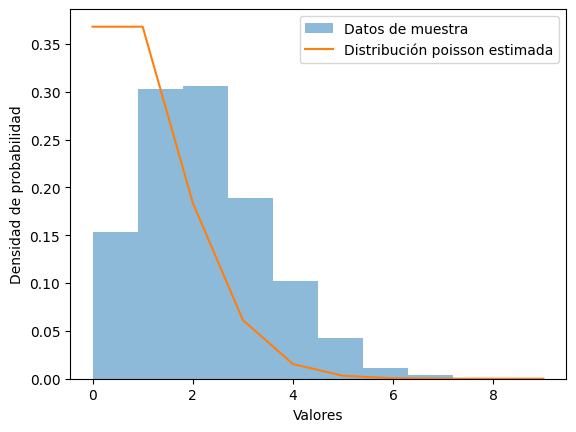

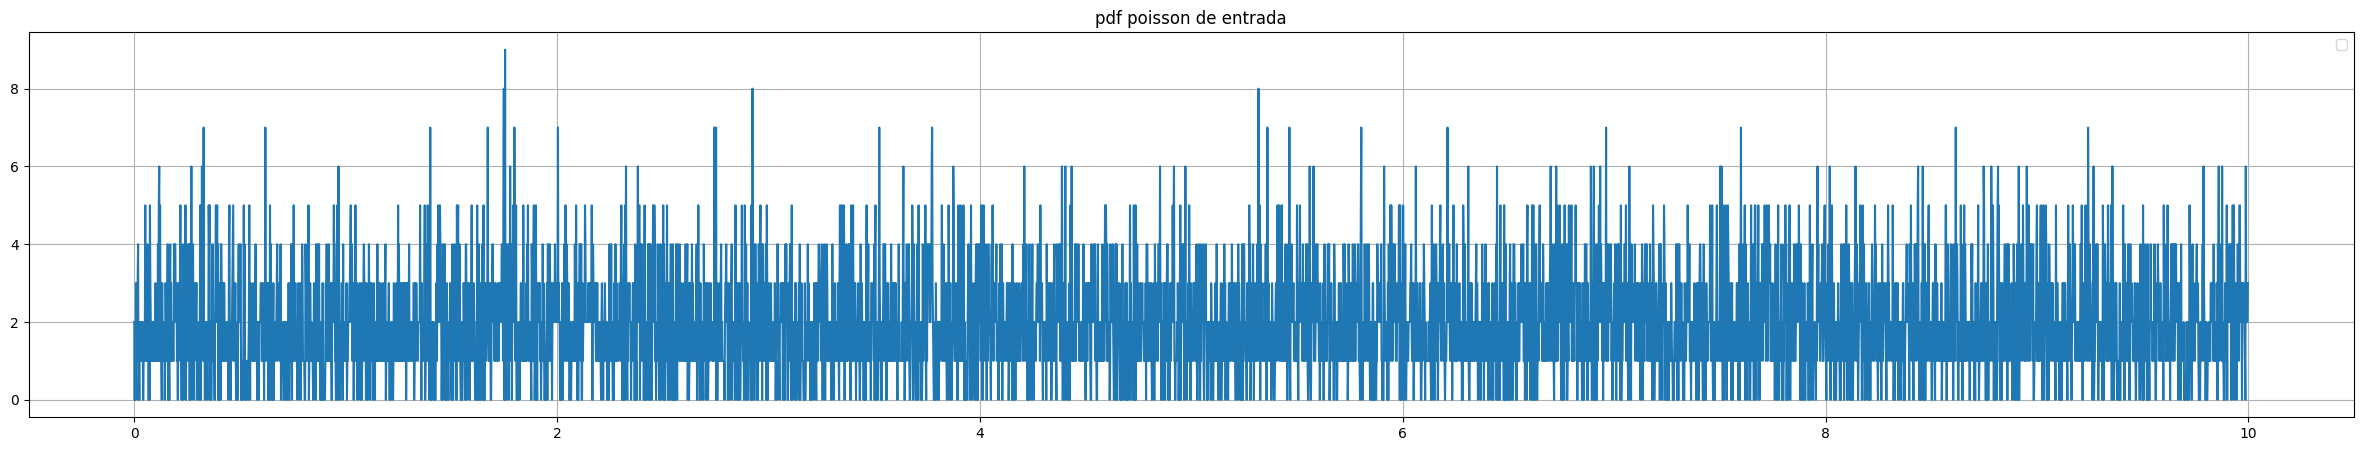

In [14]:
t=np.arange(0,10,dt) ## DEFINIMOS EL ESPACIADO DEL SISTEMA PARA CUADRAR LAS BASES DE TIEMPO
lmbda = 2 #Tasa de ocurrencias
n = len(t) # numero de muestras

u = np.random.poisson(lmbda,size=n)

# Función de log-verosimilitud para una distribución gaussiana
def log_likelihood(params, data):
    lmbda = params  # Parámetros a estimar: media y desviación estándar
    N = len(data)  # Número de muestras
    log_likelihood = n * np.log(lmbda) - lmbda * np.sum(data) - np.sum(np.log(gamma(data+1)))      #  -0.5 * N * np.log(2 * np.pi) - N * np.log(sigma) - np.sum((data - mu) ** 2) / (2 * sigma ** 2)  # Fórmula de log-verosimilitud para una distribución gaussiana
    return -log_likelihood  # Se devuelve el negativo del log-verosimilitud para minimizar

# Estimación de máxima verosimilitud de la tasa de ocurrencia de eventos lambda
result = minimize(lambda lmbda: -log_likelihood_Poisson(lmbda, u), x0=1, method='L-BFGS-B')
lmbda_hat = result.x[0]

# Generar una grilla de valores para graficar la distribución de Poisson estimada
x = np.arange(0, np.max(u)+1)
pmf = np.exp(-lmbda_hat) * np.power(lmbda_hat, x) / gamma(x+1)


# Graficar los datos de muestra y la distribución gaussiana estimada
plt.hist(u, density=True, alpha=0.5, label='Datos de muestra')  # Graficar histograma normalizado de los datos de muestra
plt.plot(x, pmf, label='Distribución poisson estimada')  # Graficar la distribución gaussiana estimada
plt.legend()  # Agregar leyenda a la gráfica
plt.xlabel('Valores')  # Etiquetar el eje x
plt.ylabel('Densidad de probabilidad')  # Etiquetar el eje y
plt.show()  # Mostrar la gráfica

plt.figure(figsize=(30,5))
plt.plot(t,u)
plt.title("pdf poisson de entrada")
plt.grid()
plt.legend()


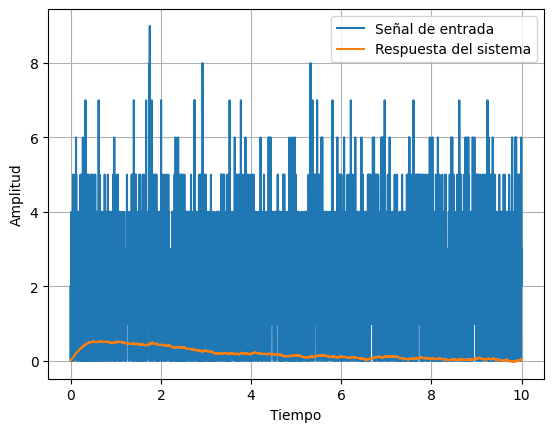

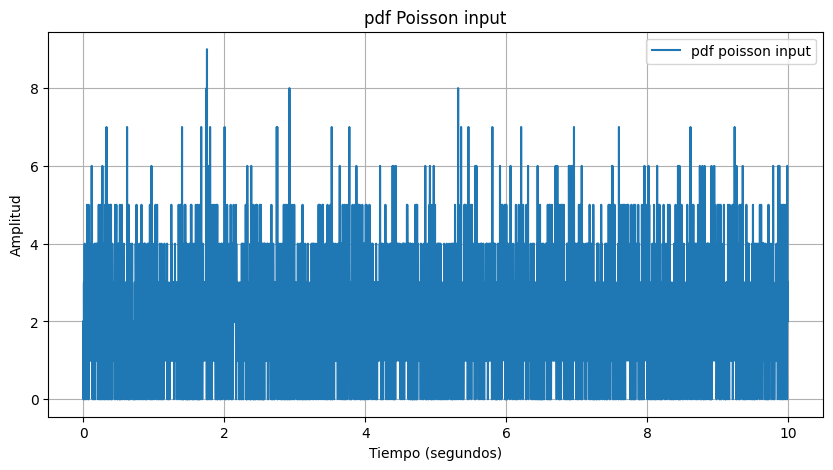

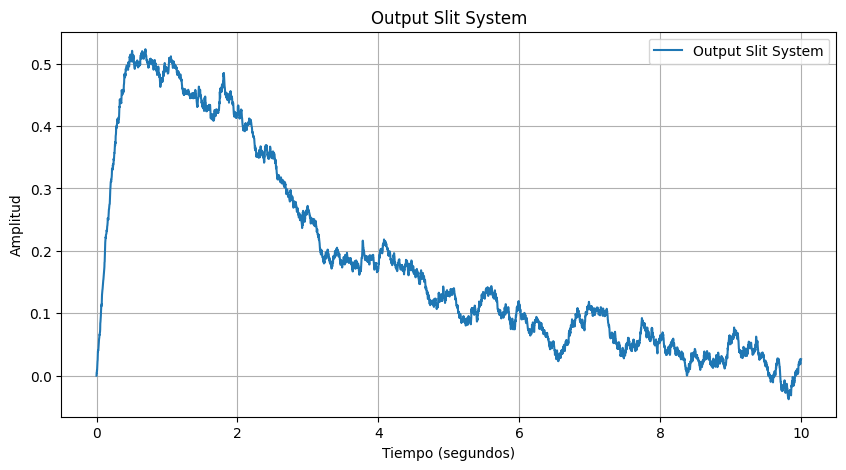

<Figure size 1000x500 with 0 Axes>

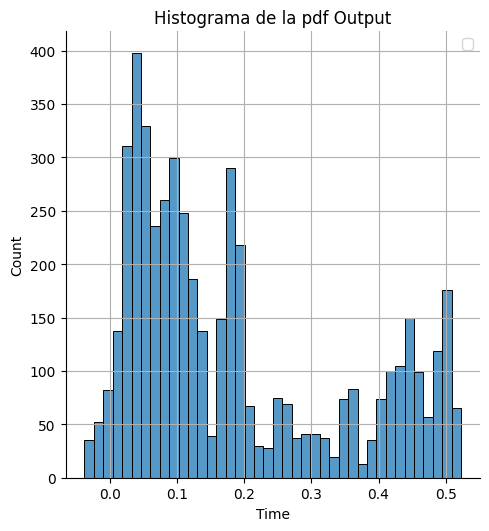

In [15]:
## CALCULANDO LA SALIDA DEL SISTEMA
# Simular la respuesta del sistema a la señal de entrada
t_out, y_1 = control.forced_response(sys_d, T=t, U=u)

plt.plot(t, u, label='Señal de entrada')
plt.plot(t_out, y_1, label='Respuesta del sistema')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

#pdf POISSON Input
plt.figure(figsize=(10,5))
plt.title("pdf Poisson input")
plt.plot(t, u,label="pdf poisson input")
plt.legend()
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Amplitud")
plt.grid()

#pdf Output:
plt.figure(figsize=(10,5))
plt.title("Output Slit System")
plt.plot(t, y_1,label="Output Slit System")
plt.legend()
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Amplitud")
plt.grid()

#Histograma de la pdf Output:
plt.figure(figsize=(10,5))
sns.displot(y_1,bins=40)
hist_kws={"edgecolor":"balck"}
plt.title("Histograma de la pdf Output")
plt.xlabel("Time")
plt.grid()
plt.legend()

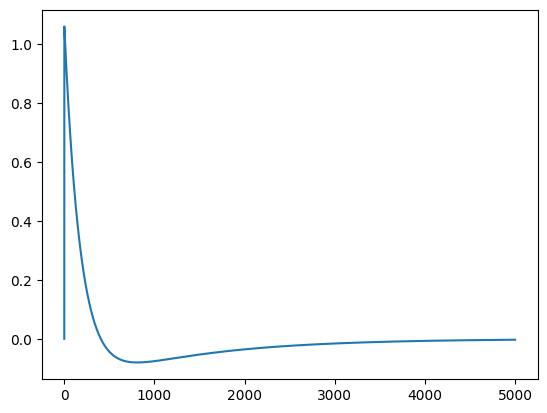

In [16]:
#Convolucion de entrada y ecuacion de transfer
y_2 = np.convolve(u, y, mode='same')  # Salida del circuito
plt.plot(y)  # Graficar la señal de entrad

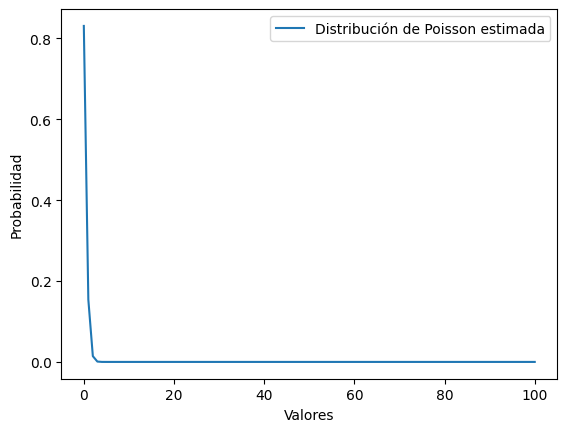

Lambda estimado: 0.18550348797139346


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

# Función de log-verosimilitud para una distribución de Poisson
def log_likelihood_poisson(lambd, y):
    log_likelihood = -lambd * np.sum(y) + len(y) * np.log(lambd) - np.sum(np.log(factorial(y)))
    return -log_likelihood

# Estimación de máxima verosimilitud de la tasa de ocurrencia de eventos lambda
lmbda_hat = np.mean(y_1)  # Estimación inicial de lambda como la media de la señal de salida

# Optimización de la estimación de lambda mediante iteraciones
for _ in range(10):
    numerator = np.sum(y_1)
    denominator = len(y_1)
    lmbda_hat_new = numerator / denominator
    if np.isclose(lmbda_hat_new, lmbda_hat):
        break
    lmbda_hat = lmbda_hat_new

# Generar una grilla de valores para graficar la distribución de Poisson estimada
x = np.arange(0, np.max(y_1) + 100)
pmf = np.exp(-lmbda_hat) * np.power(lmbda_hat, x) / factorial(x)

# Graficar la distribución de Poisson estimada
plt.plot(x, pmf, label='Distribución de Poisson estimada')
plt.legend()
plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.show()

print("Lambda estimado:", lmbda_hat)

#### 1. Señal aleatoria Gaussiana

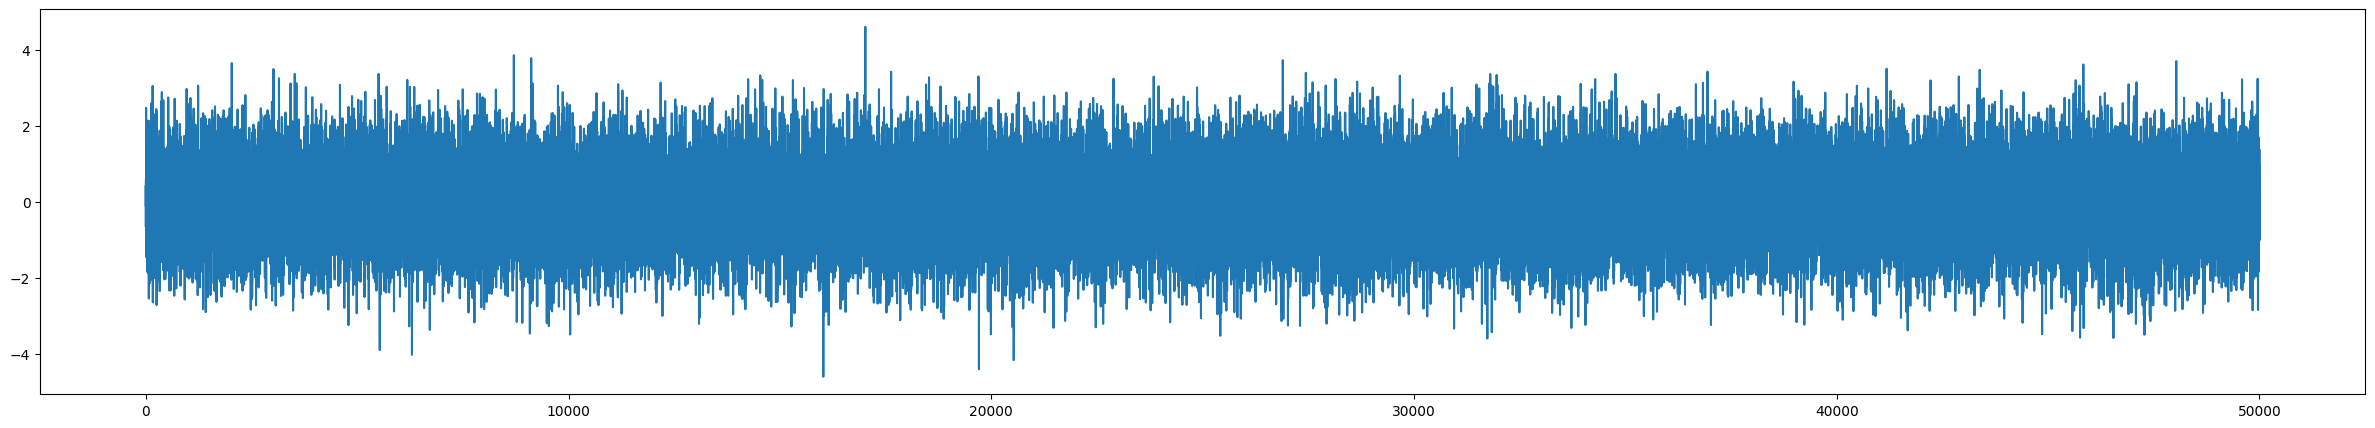

In [18]:
t1=np.arange(-50,50,dt)

media=0
varianza=1

GWN=np.random.normal(media,varianza,len(t1))

plt.figure(figsize=(30,5))

plt.plot(GWN)

#### 2. Estimación de la función de correlación 

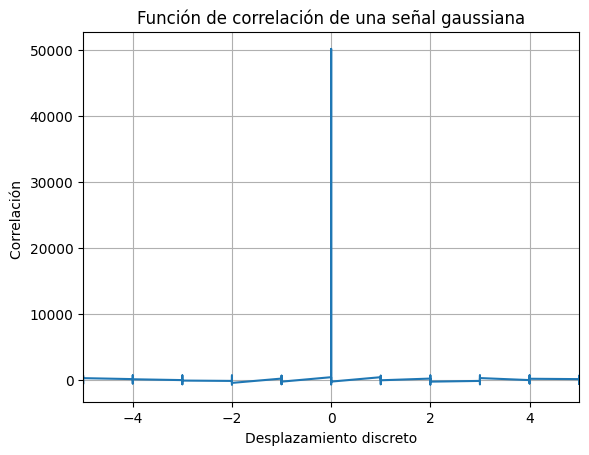

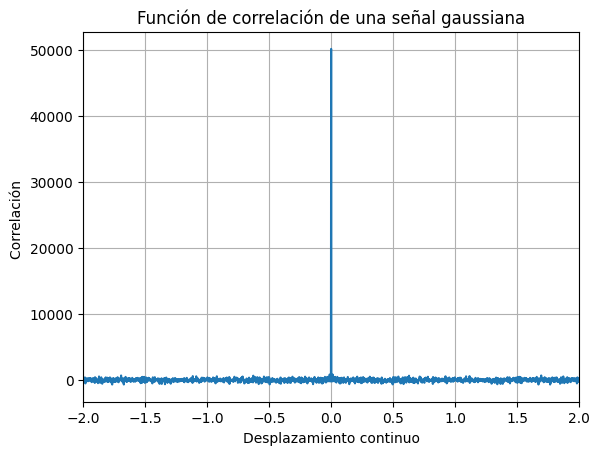

In [19]:
vector_discrete = np.round(t1).astype(int) # Vector discretizado

correlacion1=np.correlate(GWN,GWN,mode='same')
# Graficar la función de correlación
plt.plot(vector_discrete, correlacion1)
plt.xlabel('Desplazamiento discreto')
plt.ylabel('Correlación ')
plt.title('Función de correlación de una señal gaussiana')
plt.xlim(-5,5)

plt.grid(True)
plt.show()

correlacion=np.correlate(GWN,GWN,mode='same')
# Graficar la función de correlación
plt.plot(t1, correlacion)
plt.xlabel('Desplazamiento continuo')
plt.ylabel('Correlación ')
plt.title('Función de correlación de una señal gaussiana')
plt.xlim(-2,2)

plt.grid(True)
plt.show()

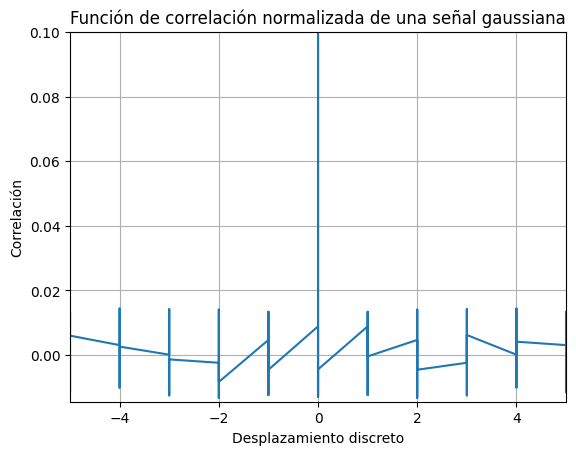

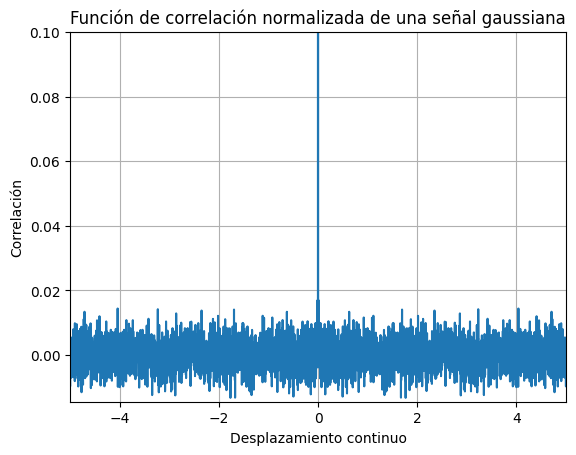

In [20]:
vector_discrete = np.round(t1).astype(int) # Vector discretizado

correlacion1 = np.correlate(GWN, GWN, mode='same')
# Normalizar la función de correlación
correlacion1 = correlacion1 / np.max(correlacion1)#se divide por el valor maximo de la funcion de correlacion para normalizar

# Graficar la función de correlación normalizada
plt.plot(vector_discrete, correlacion1)
plt.xlabel('Desplazamiento discreto')
plt.ylabel('Correlación')
plt.title('Función de correlación normalizada de una señal gaussiana')
plt.ylim(min(correlacion1),0.1)
plt.xlim(-5,5)
plt.grid(True)
plt.show()

correlacion = np.correlate(GWN, GWN, mode='same')
# Normalizar la función de correlación
correlacion = correlacion / np.max(correlacion)

# Graficar la función de correlación normalizada
plt.plot(t1, correlacion)
plt.xlabel('Desplazamiento continuo')
plt.ylabel('Correlación')
plt.title('Función de correlación normalizada de una señal gaussiana')
plt.ylim(min(correlacion1),0.1)
plt.xlim(-5,5)
plt.grid(True)
plt.show()

#### Calculo de la función de correlación normalizada (r)

In [21]:
correlacion = np.correlate(GWN, GWN, mode='same')

# Calcula la función de correlación normalizada
energia = np.sum(np.square(GWN)) # Calcula la energía de la señal GWN
r = correlacion / energia

# Imprime el valor de la función de correlación normalizada
print("Valor de la función de correlación normalizada (r):", r)

Valor de la función de correlación normalizada (r): [ 0.00205193 -0.00196707 -0.00225197 ... -0.00161122 -0.00225197
 -0.00196707]


In [22]:
primeros_30_valores = r[:30]  # Selecciona los primeros 30 valores de r
media_primeros_30 = np.mean(primeros_30_valores)

# Imprime el valor medio de los primeros 30 valores de la función de correlación normalizada
print("Valor medio de los primeros 30 valores de la función de correlación normalizada (r):", media_primeros_30)

Valor medio de los primeros 30 valores de la función de correlación normalizada (r): -7.949135945905494e-05


#### 3. Espectro de potencia de la entrada 

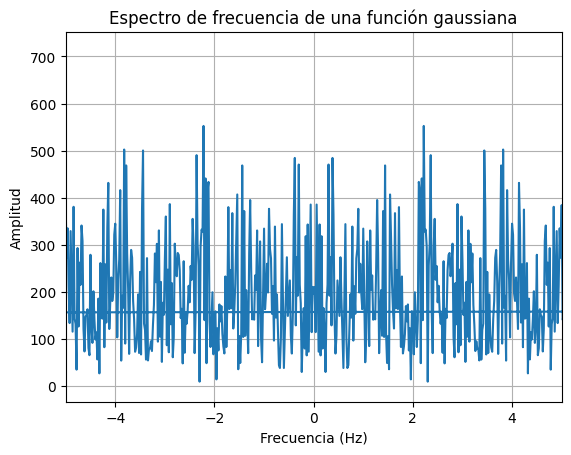

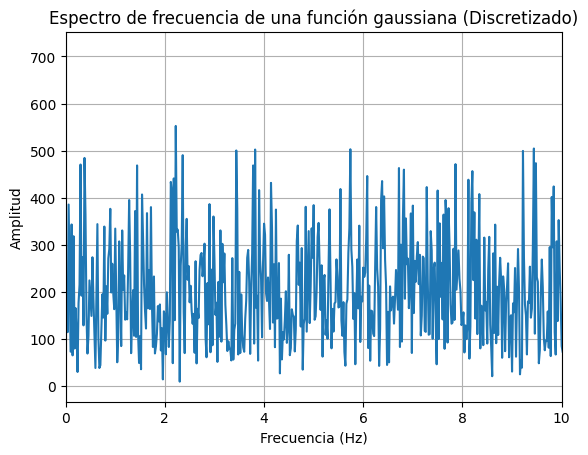

In [23]:
duration=1
sample_rate=1000
# Generar el eje de tiempo
tf = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)

# Calcular la Transformada de Fourier
fft = np.fft.fft(GWN)

# Obtener las frecuencias correspondientes
frequencies = np.fft.fftfreq(len(fft), d=1/sample_rate)

# Graficar el espectro de frecuencia
plt.plot(frequencies, np.abs(fft))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Espectro de frecuencia de una función gaussiana')
plt.xlim(-5,5)

plt.grid(True)
plt.show()

# Graficar el espectro de frecuencia
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft)[:len(frequencies)//2])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Espectro de frecuencia de una función gaussiana (Discretizado)')
plt.xlim(0,10)
plt.grid(True)
plt.show()

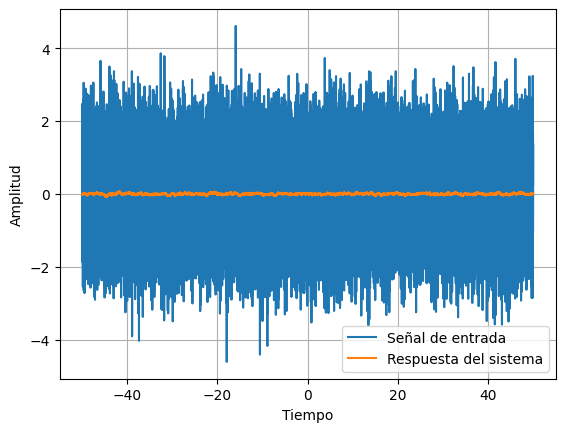

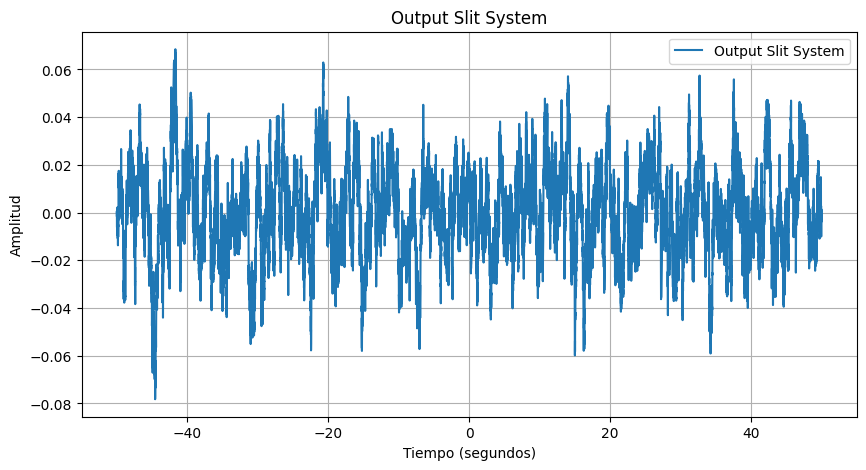

<Figure size 1000x500 with 0 Axes>

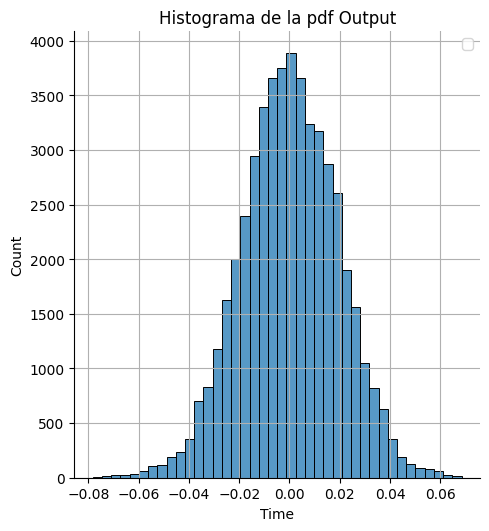

In [24]:
t_out_1, y_4 = control.forced_response(sys_d, T=t1, U=GWN)
plt.plot(t1, GWN, label='Señal de entrada')
plt.plot(t_out_1, y_4, label='Respuesta del sistema')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

#pdf Output:
plt.figure(figsize=(10,5))
plt.title("Output Slit System")
plt.plot(t1, y_4,label="Output Slit System")
plt.legend()
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Amplitud")
plt.grid()

#Histograma de la pdf Output:
plt.figure(figsize=(10,5))
sns.displot(y_4,bins=40)
hist_kws={"edgecolor":"balck"}
plt.title("Histograma de la pdf Output")
plt.xlabel("Time")
plt.grid()
#plt.xlim(-1,1)
plt.legend()

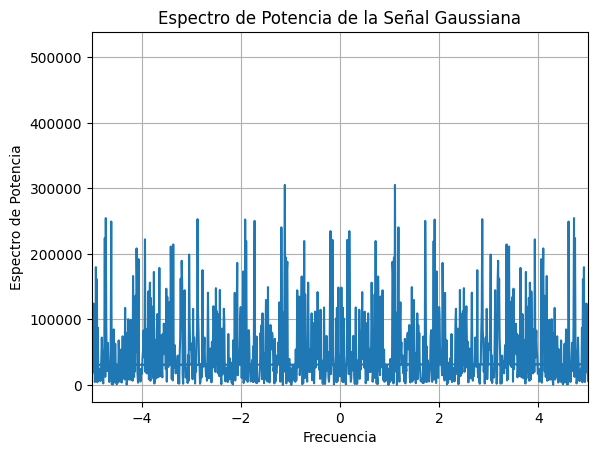

In [25]:
espectro = np.abs(np.fft.fft(GWN)) ** 2

# Calcular las frecuencias correspondientes
frecuencias = np.fft.fftfreq(len(t1), t[1] - t[0])

# Graficar el espectro de potencia
plt.plot(frecuencias, espectro)
plt.xlabel('Frecuencia')
plt.ylabel('Espectro de Potencia')
plt.title('Espectro de Potencia de la Señal Gaussiana')
plt.xlim(-5,5)

plt.grid(True)
plt.show()

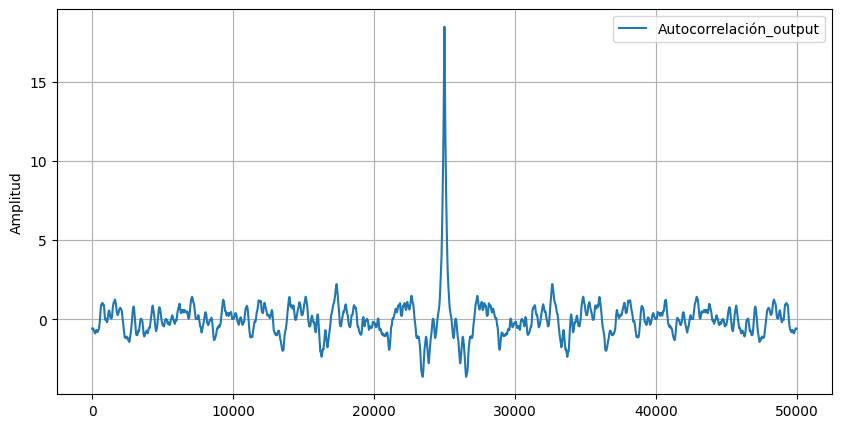

In [26]:
autocorrelacion_output=np.correlate(y_4,y_4,mode="same")

#Autocorrelación output:
plt.figure(figsize=(10,5))
plt.plot(autocorrelacion_output,label="Autocorrelación_output")
plt.legend()
plt.ylabel("Amplitud")
plt.grid()

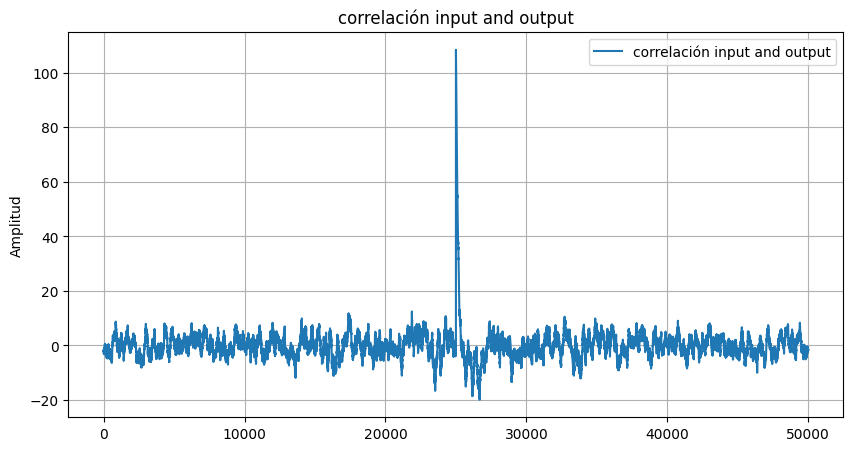

<Figure size 1000x500 with 0 Axes>

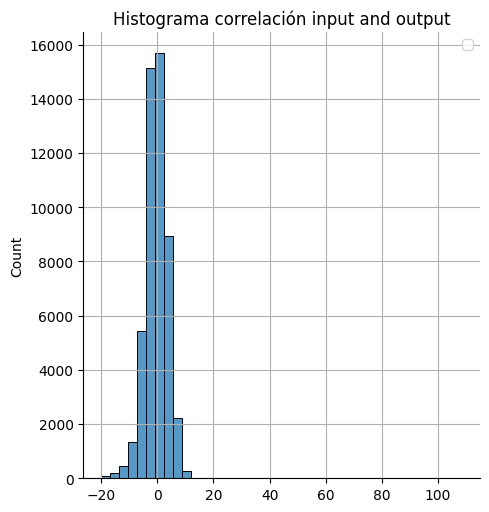

In [27]:
correlacion_input_output=np.correlate(y_4,GWN,mode="same")

#correlación input and output:
plt.figure(figsize=(10,5))
plt.title("correlación input and output")
plt.plot(correlacion_input_output,label="correlación input and output")
plt.legend()
plt.ylabel("Amplitud")
plt.grid()


#Histograma correlación input and output:
plt.figure(figsize=(10,5))
sns.displot(correlacion_input_output,bins=40)
hist_kws={"edgecolor":"balck"}
plt.title("Histograma correlación input and output")
plt.grid()
plt.legend()

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def Ploteo_tiempo_frecuencia(tiempo, Funcion_tiempo, xmax=None, xmin=None):
    # La frecuencia de muestreo la extraigo del vector de tiempo
    Frecuencia_muestreo = tiempo[1] - tiempo[0]
    Y = np.fft.fftshift(np.fft.fft(Funcion_tiempo))
    W = np.fft.fftshift(np.fft.fftfreq(Y.shape[0], Frecuencia_muestreo))  # Vector de frecuencias
    
    # Inicializa la figura con un tamaño adecuado 
    plt.figure(figsize=(16, 5), dpi=90)
    
    # Graficamos la función en el tiempo
    plt.subplot(121)
    plt.plot(Funcion_tiempo, color='C0')
    plt.title("Correlación")
    plt.grid(True)
    plt.ylabel('Amplitud')
    
    # Graficamos la representación en frecuencia
    plt.subplot(122)
    plt.plot(W, Y, color='C1')
    plt.title('Representación en Frecuencia')
    plt.grid(True)
    if xmin != None and xmax != None:
        plt.xlim(xmin, xmax)
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Amplitud')

def Ploteo_tiempo_frecuencia2(tiempo, Funcion_tiempo, xmax=None, xmin=None):
    # La frecuencia de muestreo la extraigo del vector de tiempo
    Frecuencia_muestreo = tiempo[1] - tiempo[0]
    Y = np.fft.fftshift(np.fft.fft(Funcion_tiempo))
    W = np.fft.fftshift(np.fft.fftfreq(Y.shape[0], Frecuencia_muestreo))  # Vector de frecuencias
    
    # Inicializa la figura con un tamaño adecuado 
    plt.figure(figsize=(25, 5), dpi=90)
    plt.plot(W, Y, color='C1')
    plt.title('Representación en Frecuencia')
    plt.grid(True)
    if xmin != None and xmax != None:
        plt.xlim(xmin, xmax)
    plt.xlabel('Frecuencia [KHz]')
    plt.ylabel('Amplitud')

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


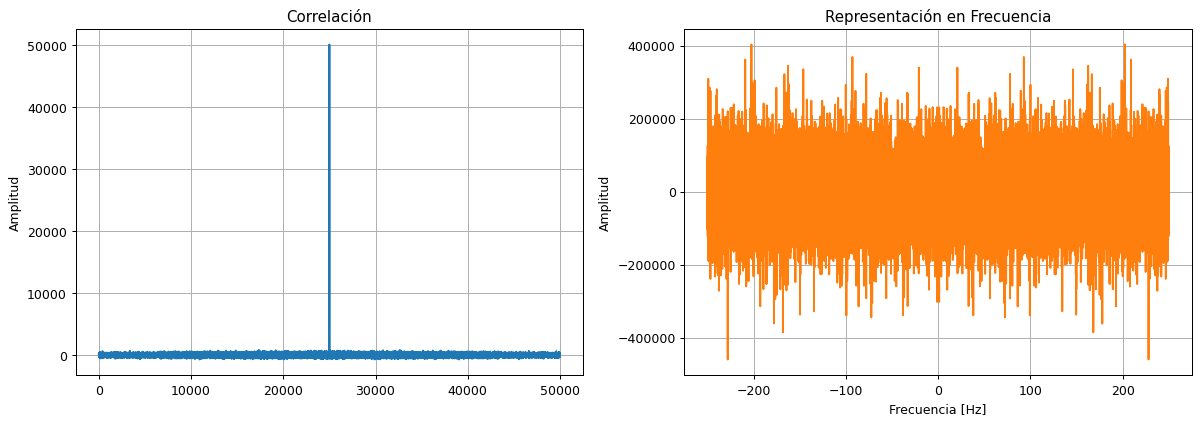

In [29]:
#Espectro de potencia pdf gaussiana de entrada:
Ploteo_tiempo_frecuencia(t1,correlacion)

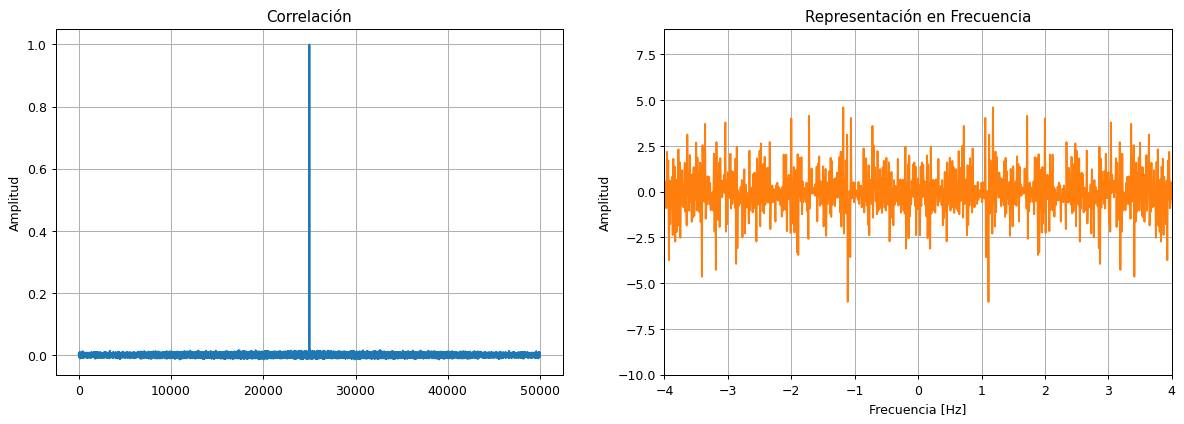

In [30]:
#Espectro de potencia pdf gaussiana de salida:
Ploteo_tiempo_frecuencia(t,correlacion1,xmax=4,xmin=-4)

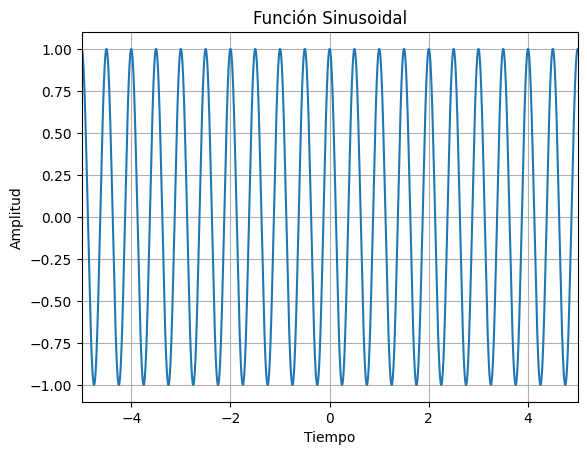

In [31]:
# Parámetros de la función sinusoidal
amplitud = 1.0
frecuencia = 2.0  # Número de ciclos por unidad de tiempo
fase = np.pi / 2  # Fase inicial en radianes
N = len(t1)  # Número total de muestras


# Cálculo de la función sinusoidal
sen = amplitud * np.sin(2*np.pi*frecuencia*t1 + fase)


# Graficar la función sinusoidal
plt.plot(t1, sen)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Función Sinusoidal')
plt.xlim(-5,5)
plt.grid(True)
plt.show()


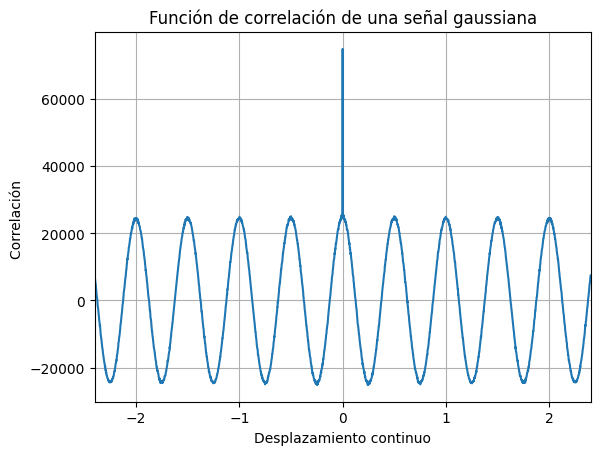

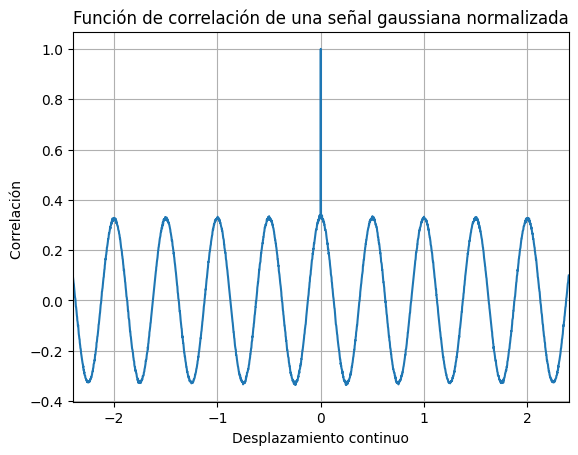

In [32]:

señal_generada=sen+GWN

correlacion_sen=np.correlate(señal_generada,señal_generada,mode='same')

correlacion_sen_n=correlacion_sen/np.max(correlacion_sen)
# Graficar la función de correlación
plt.plot(t1, correlacion_sen)
plt.xlabel('Desplazamiento continuo')
plt.ylabel('Correlación ')
plt.title('Función de correlación de una señal gaussiana')
plt.xlim(-2.4,2.4)
plt.grid(True)
plt.show()

plt.plot(t1, correlacion_sen_n)
plt.xlabel('Desplazamiento continuo')
plt.ylabel('Correlación ')
plt.title('Función de correlación de una señal gaussiana normalizada')
plt.xlim(-2.4,2.4)

plt.grid(True)
plt.show()










#### 5. Ingresar la señal de ruido blanco gaussiano al circuito 

In [41]:
from scipy import signal

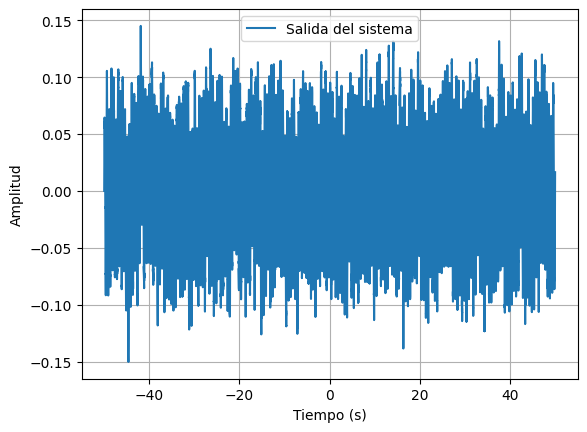

In [58]:
# Calcular la respuesta del sistema a la señal de entrada
t, ycc= control.forced_response(sys, t1, señal_generada)

# Graficar la señal de entrada y la respuesta del sistema
plt.figure()
plt.plot(t, ycc, label='Salida del sistema')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

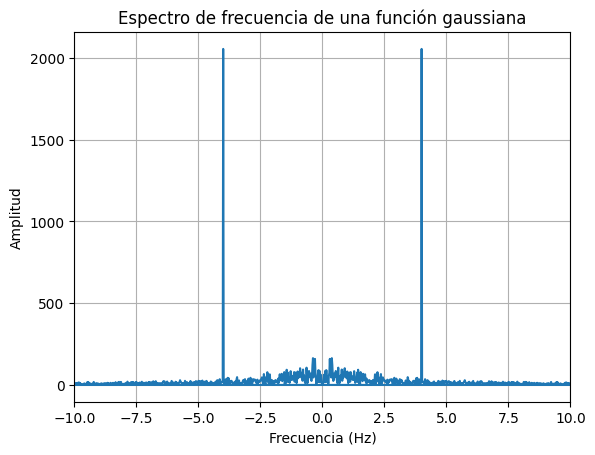

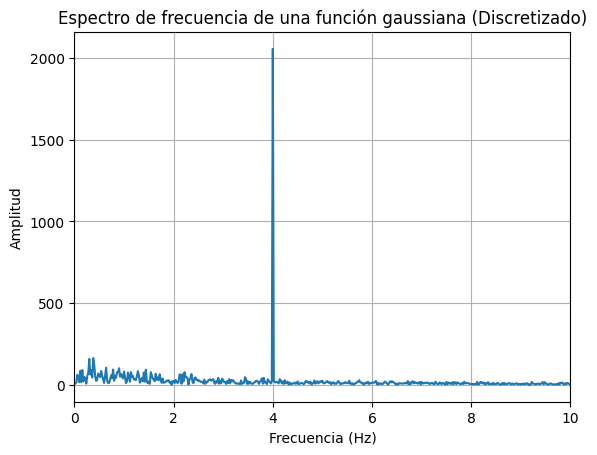

In [62]:
duration=1
sample_rate=1000
# Generar el eje de tiempo
tf = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)

# Calcular la Transformada de Fourier
fft = np.fft.fft(ycc)

# Obtener las frecuencias correspondientes
frequencies = np.fft.fftfreq(len(fft), d=1/sample_rate)

# Graficar el espectro de frecuencia
plt.plot(frequencies, np.abs(fft))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Espectro de frecuencia de una función gaussiana')
plt.xlim(-10,10)
plt.grid(True)
plt.show()

# Graficar el espectro de frecuencia
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft)[:len(frequencies)//2])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Espectro de frecuencia de una función gaussiana (Discretizado)')
plt.xlim(0,10)
plt.grid(True)
plt.show()

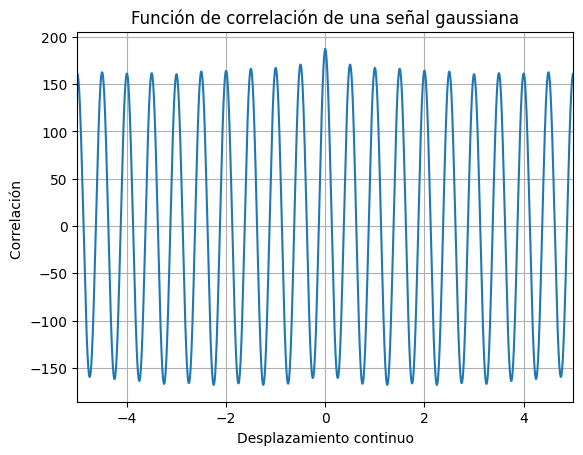

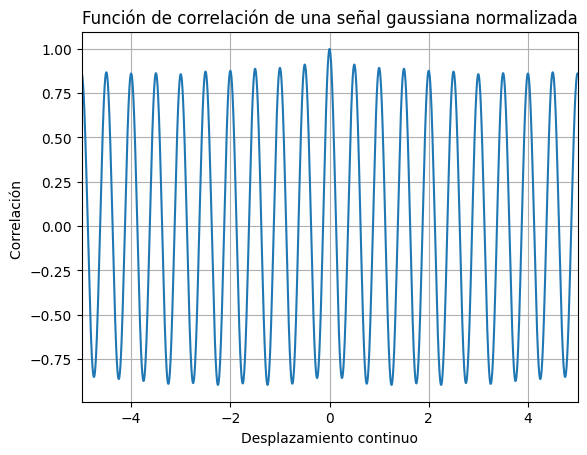

In [77]:
correlacion_input_outputcc=np.correlate(ycc,ycc,mode="same")

correlacion_cc_n=correlacion_input_outputcc/np.max(correlacion_input_outputcc)
# Graficar la función de correlación
plt.plot(t1, correlacion_input_outputcc)
plt.xlabel('Desplazamiento continuo')
plt.ylabel('Correlación ')
plt.title('Función de correlación de una señal gaussiana')
plt.xlim(-5,5)
plt.grid(True)
plt.show()

plt.plot(t1, correlacion_cc_n)
plt.xlabel('Desplazamiento continuo')
plt.ylabel('Correlación ')
plt.title('Función de correlación de una señal gaussiana normalizada')
plt.xlim(-5,5)
plt.grid(True)
plt.show()